Artificial Neural Networks

Rectified Linear Unit Function(ReLU)

Notation: ReLU:(t)
        0 if T<= 0 
        1 if T>0

### Every time you do the matrix * vector multiplication its called a 'layer'

Relu(Relu(X01)X02)

When you see the word deep learning it means there are atleast two layers


In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt


# building a hand written digit classifier


In [2]:
# use keras to import the MNIST dataset
(X,y),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X.shape

(60000, 28, 28)

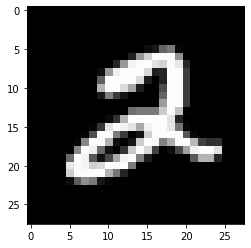

In [4]:
plt.imshow(X[5],cmap='gray')

In [5]:
model= keras.Sequential([# sequentaial means apply one step after another ( there are other orders to do this is in)
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(units=300 , activation ='relu'),
    keras.layers.Dense(units=100 , activation ='relu'),
    keras.layers.Dense(units=10, activation='softmax') # there are 10 classes from 0 to 9),
])
#matricies 0i are called the layers
#the Rows (of the 0i) are called neurons

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# create a validation set 9 (to check whether the model is over fitting the data or not)
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y)

In [8]:
model.compile(loss='sparse_categorical_crossentropy', # Loss: the optimizer will minimize the loss function ( 
              #root mean swuared error(regression), 
              #sparse cross entropy(classification)),
              
             optimizer='adam', #optimizer: algorithms to train the model - 
              #gradient decent (1847) 
              #ADAM(2014)
             metrics='accuracy') #metric to evaluate the model

In [9]:
training_history= model.fit(X_train,y_train,
                           epochs=30,# number of time the optimizer will pass through the data
                           validation_data=(X_val,y_val))

Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7550 - accuracy: 0.8607 - val_loss: 0.3991 - val_accuracy: 0.9076
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3103 - accuracy: 0.9223 - val_loss: 0.3347 - val_accuracy: 0.9181
Epoch 3/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2064 - accuracy: 0.9446 - val_loss: 0.2299 - val_accuracy: 0.9443
Epoch 4/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1757 - accuracy: 0.9526 - val_loss: 0.2097 - val_accuracy: 0.9477
Epoch 5/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1451 - accuracy: 0.9601 - val_loss: 0.2119 - val_accuracy: 0.9487
Epoch 6/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1365 - accuracy: 0.9628 - val_loss: 0.1899 - val_accuracy: 0.9556
Epoch 7/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1172 - accuracy: 0.9687 - val_loss: 0.1938 - val_accuracy:

<AxesSubplot:>

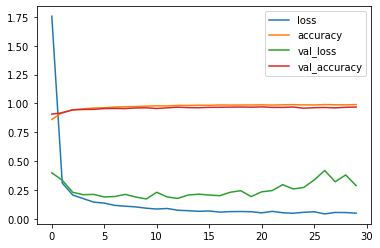

In [10]:
pd.DataFrame(training_history.history).plot() # once the validation loss starts to increase you begin over fitting for model

### once the validation loss starts to increase is when the model is over fitting data for model
- Use the epochs parameter to get the correct model

In [11]:
model.evaluate (X_test,y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.2450 - accuracy: 0.9701


[0.24501106142997742, 0.9700999855995178]

In [12]:
## 97 of correct classifications

## Regression Model

In [13]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/kc_house_data.csv'

In [18]:
data=pd.read_csv(url)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
X=data.drop(['id','date','price'],axis='columns')
y=data.price

In [21]:
# always scale the data before trying to train a neural network
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_scaled,y)


In [40]:
#build a regression model
model = keras.models.Sequential([
    keras.layers.Dense(units=50,activation='relu'),
    keras.layers.Dense(units=50,activation='relu'),
    keras.layers.Dense(units=50,activation='relu'),
    keras.layers.Dense(units=1)
])

In [41]:
# compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics='mean_squared_error')

In [42]:
# train
model.fit(X_train,y_train,
         epochs=100,
         validation_data=(X_val,y_val))

Epoch 1/100
507/507 [==============================] - 2s 1ms/step - loss: 378307936256.0000 - mean_squared_error: 378307936256.0000 - val_loss: 198903250944.0000 - val_mean_squared_error: 198903250944.0000
Epoch 2/100
507/507 [==============================] - 1s 3ms/step - loss: 92198051840.0000 - mean_squared_error: 92198051840.0000 - val_loss: 62400307200.0000 - val_mean_squared_error: 62400307200.0000
Epoch 3/100
507/507 [==============================] - 1s 1ms/step - loss: 59599351808.0000 - mean_squared_error: 59599351808.0000 - val_loss: 51955388416.0000 - val_mean_squared_error: 51955388416.0000
Epoch 4/100
507/507 [==============================] - 1s 1ms/step - loss: 51115446272.0000 - mean_squared_error: 51115446272.0000 - val_loss: 44925992960.0000 - val_mean_squared_error: 44925992960.0000
Epoch 5/100
507/507 [==============================] - 1s 3ms/step - loss: 45029036032.0000 - mean_squared_error: 45029036032.0000 - val_loss: 39513698304.0000 - val_mean_squared_error

507/507 [==============================] - 1s 3ms/step - loss: 27657558016.0000 - mean_squared_error: 27657558016.0000 - val_loss: 25567899648.0000 - val_mean_squared_error: 25567899648.0000
Epoch 82/100
507/507 [==============================] - 1s 3ms/step - loss: 27621226496.0000 - mean_squared_error: 27621226496.0000 - val_loss: 25500643328.0000 - val_mean_squared_error: 25500643328.0000
Epoch 83/100
507/507 [==============================] - 1s 1ms/step - loss: 27550750720.0000 - mean_squared_error: 27550750720.0000 - val_loss: 25406547968.0000 - val_mean_squared_error: 25406547968.0000
Epoch 84/100
507/507 [==============================] - 1s 3ms/step - loss: 27527694336.0000 - mean_squared_error: 27527694336.0000 - val_loss: 25514840064.0000 - val_mean_squared_error: 25514840064.0000
Epoch 85/100
507/507 [==============================] - 1s 1ms/step - loss: 27505338368.0000 - mean_squared_error: 27505338368.0000 - val_loss: 25389959168.0000 - val_mean_squared_error: 2538995916

In [43]:
y_train_pred=model.predict(X_train)
y_val_pred=model.predict(X_val)

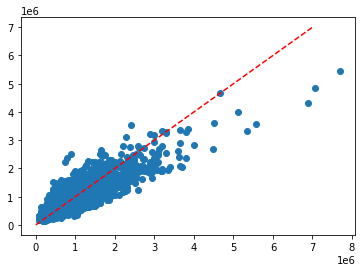

In [45]:
plt.scatter(y_train,y_train_pred)
plt.plot([0,7e6],[0,7e6],'--',color='red')

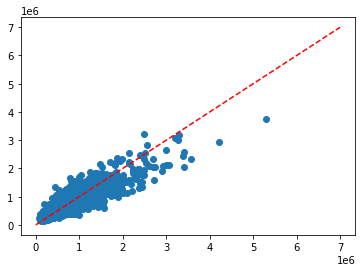

In [46]:
plt.scatter(y_val,y_val_pred)
plt.plot([0,7e6],[0,7e6],'--',color='red')

In [ ]:
## use a regular Machine learning linear Regession model and compare 